In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve)

In [2]:
import pandas as pd

# Load the dataset (run this before doing df_clean)
df = pd.read_csv('Loan_default.csv')

# Drop missing values
df_clean = df.dropna()

# Features and target
X = df_clean.drop('Default', axis=1) 

# Target column name should match exactly
y = df_clean['Default']

In [3]:
# Step 1: Load and clean data
import pandas as pd

df = pd.read_csv('Loan_default.csv')
df_clean = df.dropna()

# Step 2: Split features and target
X = df_clean.drop('Default', axis=1)
y = df_clean['Default']

# Step 3: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Step 4: Keep only categorical columns with low cardinality (<= 20 unique values)
safe_cats = [col for col in categorical_cols if X[col].nunique() <= 20]

# Step 5: One-hot encode only safe categorical columns
X_encoded = pd.get_dummies(X[safe_cats], drop_first=True)

# Step 6: Drop all original categorical columns (even high-cardinality ones)
X_reduced = X.drop(columns=categorical_cols)

# Step 7: Final feature set
X_final = pd.concat([X_reduced, X_encoded], axis=1)

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [6]:
#Import and Train Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Predict and evaluate
y_pred_tree = dtree.predict(X_test)
y_prob_tree = dtree.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Metrics
print("🌳 Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_tree):.4f}")

🌳 Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.20      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.56      0.55     51070
weighted avg       0.82      0.80      0.81     51070

Confusion Matrix:
 [[39619  5551]
 [ 4525  1375]]
Accuracy: 0.8027
Precision: 0.1985
Recall: 0.2331
F1 Score: 0.2144
ROC AUC Score: 0.5551


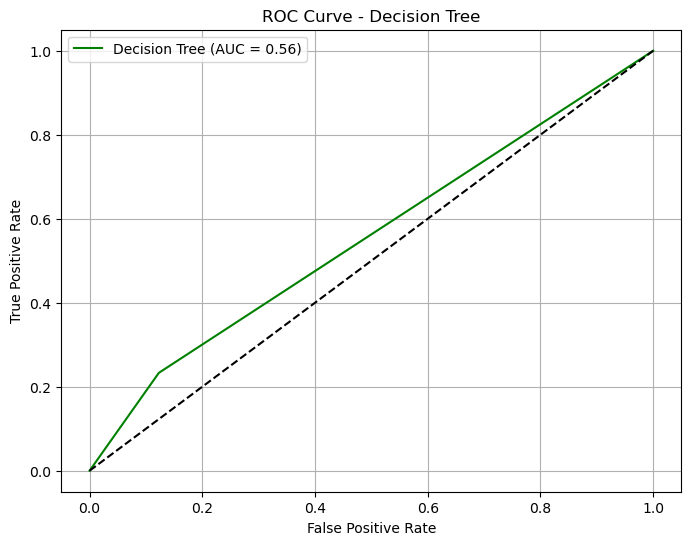

In [9]:
# Plot ROC Curve
import matplotlib.pyplot as plt  

from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_tree):.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()